### Titanic data Visualization
Using Seaborn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings


In [4]:
titanic = pd.read_csv("/Users/Akaash/Downloads/train.csv") #loading the files (filename:Train.csv)
titanic.head(10)                                           #viewing first 10 values/records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Data dictionary of train.csv
#survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [5]:
titanic.shape  #(rows=891,coln=12)

(891, 12)

In [6]:
#To get data types for each column
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [12]:
#To get Survive count 
titanic.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

## Visualization

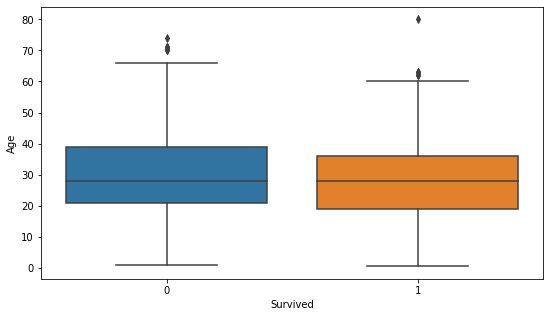

In [18]:
#Boxplot -- Relation between Survived vs age variable
fig, ax = plt.subplots(figsize=(9,5))
sns.boxplot(x='Survived', y="Age",  data=titanic);

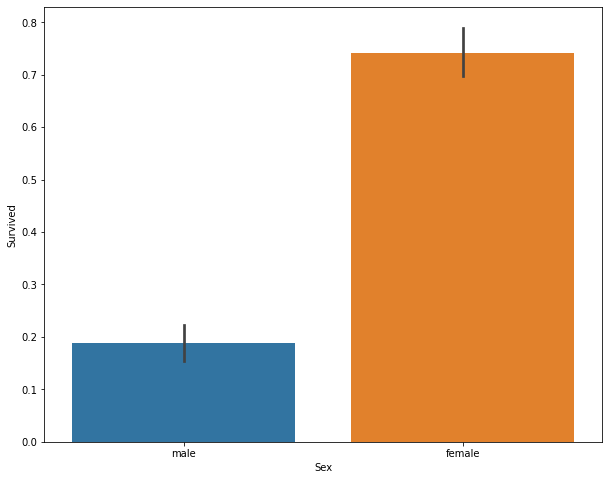

In [19]:
#Boxplot -- Relation between sex vs Survived variable
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='Sex', y="Survived",  data=titanic);

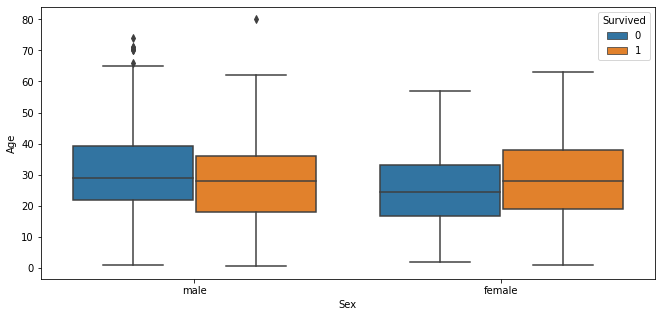

In [25]:
#Boxplot -- Relation between sex vs age vs Survived variable
f, ax = plt.subplots(figsize=(11,5))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=titanic);

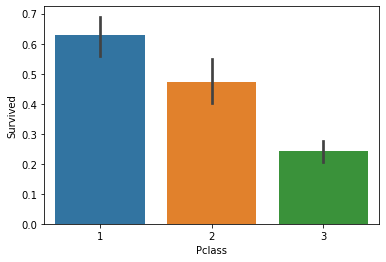

In [28]:
#Barplot-- Relation between Plass vs Survived Variable
sns.barplot(x="Pclass", y="Survived", data=titanic);

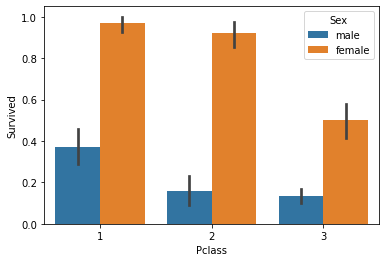

In [29]:
#Barplot-- Relation between Plass vs Survived vs Sex Variable
sns.barplot(x="Pclass", y="Survived",hue="Sex", data=titanic);

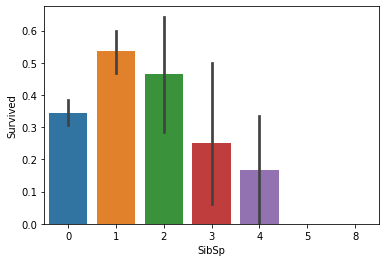

In [30]:
#Barplot-- Relation between Sibsp vs Survived Variable
sns.barplot(x="SibSp", y="Survived", data=titanic);

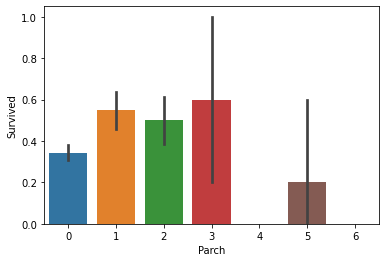

In [31]:
#Barplot-- Relation between Parch vs Survived Variable
sns.barplot(x="Parch", y="Survived", data=titanic);

#### Distribution Plots

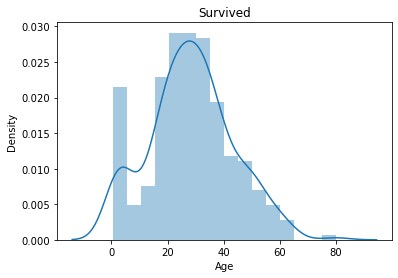

In [38]:
#Distribution Plot --For Survived
survived = titanic.loc[titanic['Survived']==1,"Age"].dropna()
sns.distplot(survived)
plt.title("Survived");

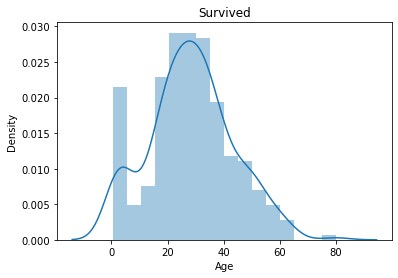

In [50]:
#Distribution Plot --For Not Survived
survived = titanic.loc[titanic['Survived']==1,"Age"].dropna()
sns.distplot(survived)
plt.title("Survived");

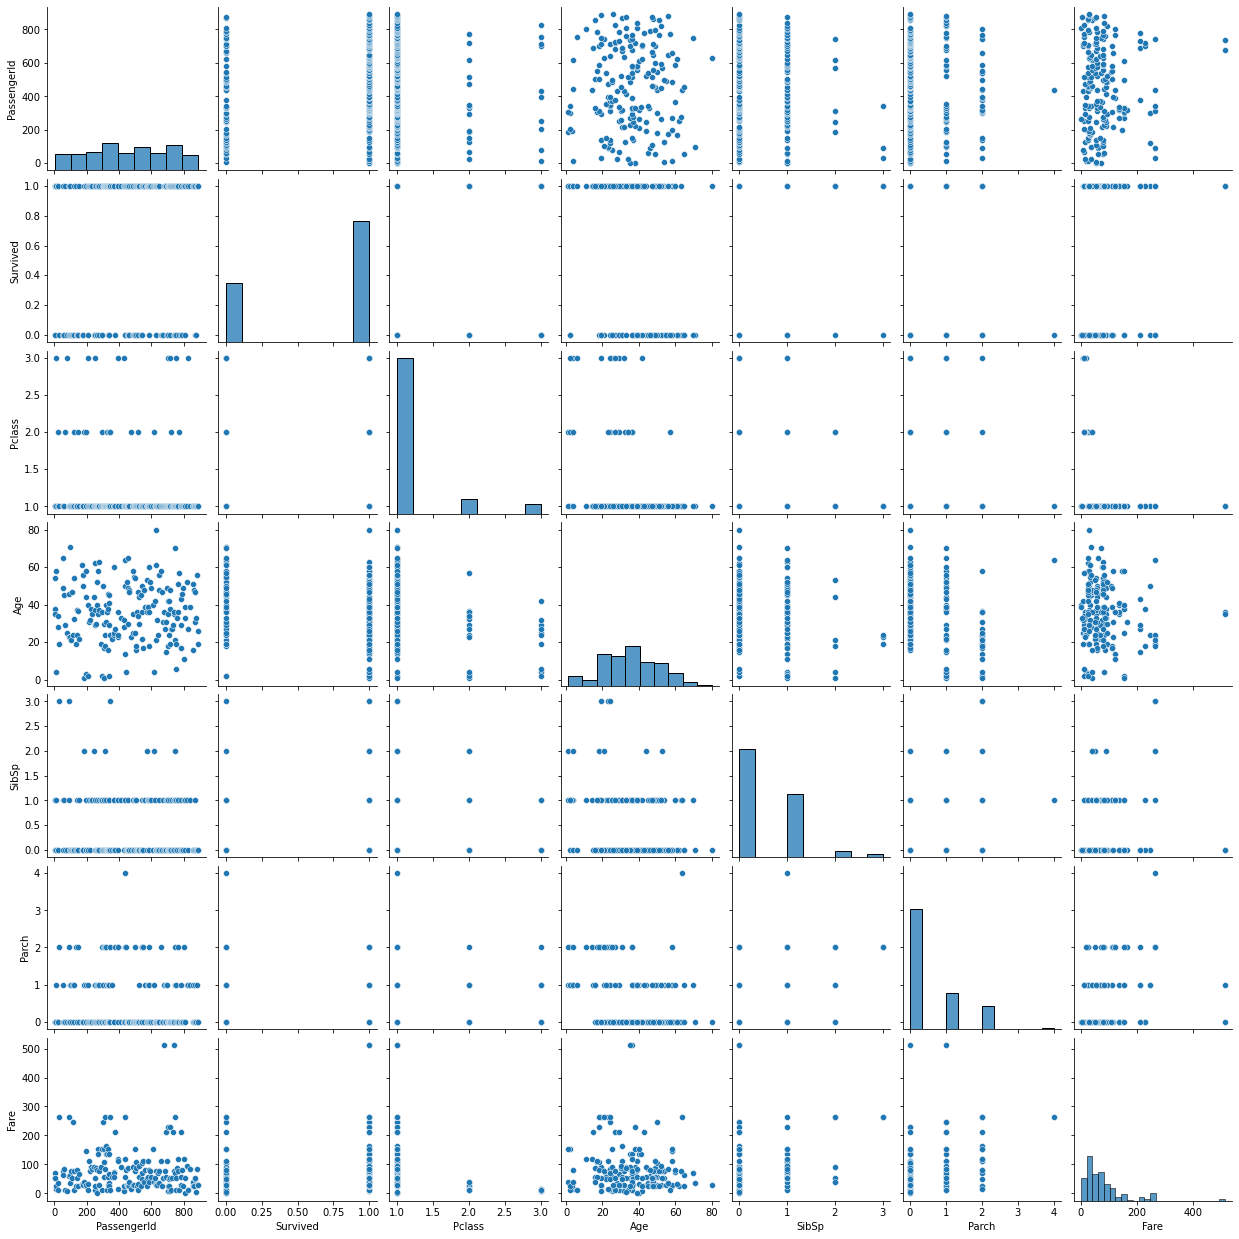

In [51]:
#Pairplots --For Each variable in the data set
sns.pairplot(titanic.dropna());

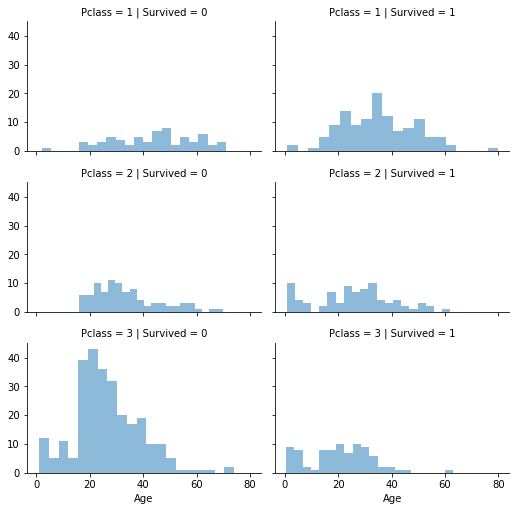

In [52]:
#Facegrid --Pclass vs Survive
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.4, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

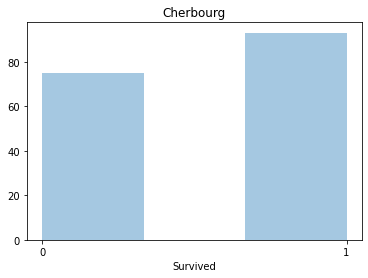

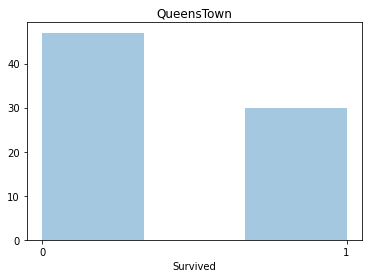

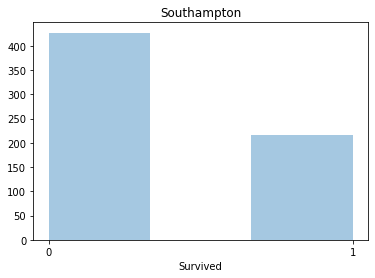

In [53]:
#Distribution plots -- to study Embarked Variable --From where Passenger Boarded More
sns.distplot(a=data[data['Embarked']=='C']['Survived'],bins=3,kde=False)
plt.title("Cherbourg")
plt.xticks([0,1])
plt.show()
plt.title("QueensTown")
sns.distplot(a=data[data['Embarked']=='Q']['Survived'],bins=3,kde=False)
plt.xticks([0,1])
plt.show()
plt.title("Southampton")
sns.distplot(a=data[data['Embarked']=='S']['Survived'],bins=3,kde=False)
plt.xticks([0,1])
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

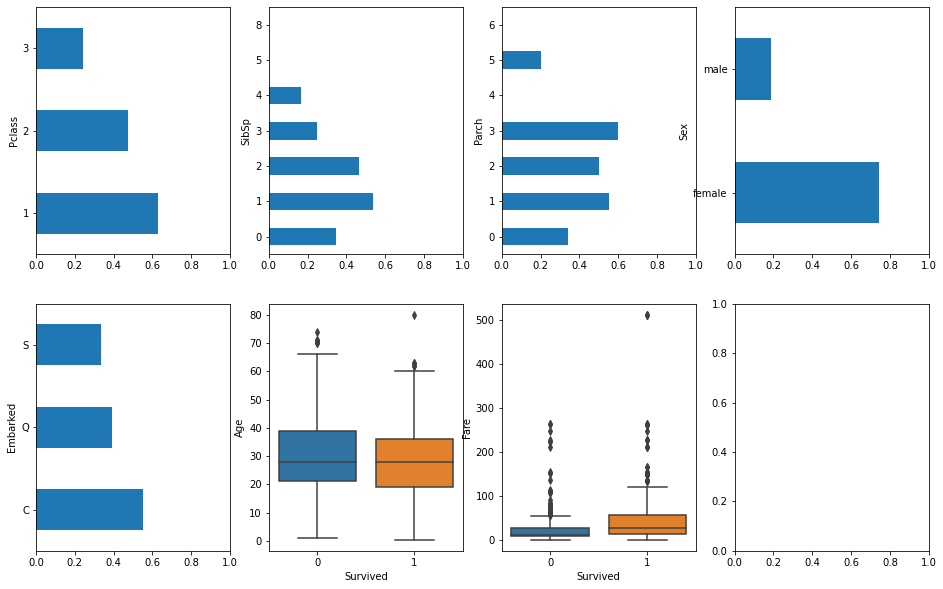

In [54]:
#Subplots for Different Variable
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=data,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=data,ax=axesbi[1,2])